<h1>Exercise 6</h1>

In [47]:
# imports

import numpy as N
import pandas as P
import scipy.stats as S
import sklearn.cluster as SC
import sklearn.decomposition as SD
import sklearn.preprocessing as SP

<h2>1.</h2>

In [48]:
# load iris dataset

iris = P.read_csv('./e6-data/iris_csv.csv',
                # field separator character
                sep=",",
                # missing value characters
                na_values=["?"],
                # no row names
                index_col=False,
                # no column names
                header=0)

# seperate quantitative columns

iris_values = iris.iloc[:,0:4]

# map the colors

color_mapping = {'Iris-setosa': 2,
                 'Iris-versicolor': 1,
                 'Iris-virginica': 0}

iris['color'] = iris['class'].map(color_mapping)

iris

,sepallength,sepalwidth,petallength,petalwidth,class,color
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


<Axes: title={'center': 'Sepal length vs. Sepal width'}, xlabel='Sepal length (cm)', ylabel='Sepal width (cm)'>

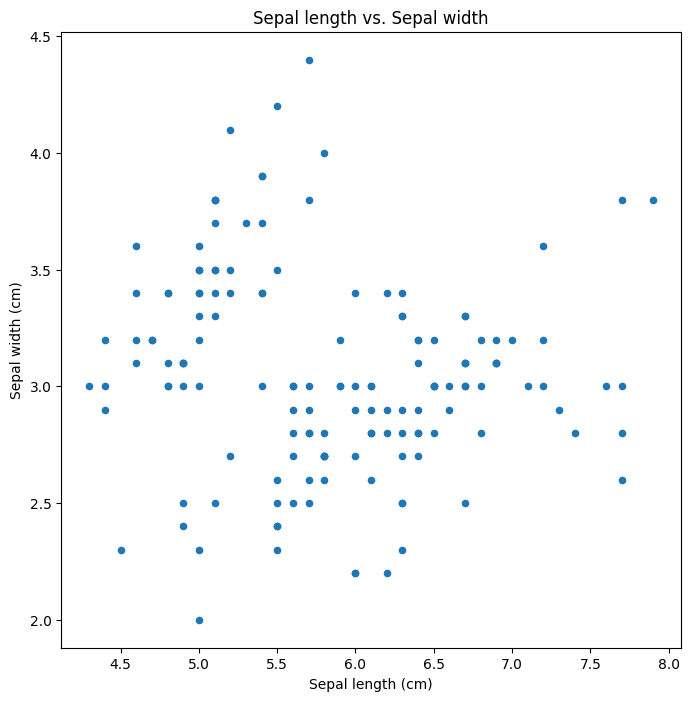

In [49]:
# plot data (Sepal length (on X axis) vs. Sepal width (on Y axis))

iris.plot.scatter('sepallength','sepalwidth',
                   title="Sepal length vs. Sepal width",
                   xlabel="Sepal length (cm)",
                   ylabel="Sepal width (cm)",
                   figsize=(8,8))

array([[<Axes: xlabel='sepallength', ylabel='sepallength'>,
        <Axes: xlabel='sepalwidth', ylabel='sepallength'>,
        <Axes: xlabel='petallength', ylabel='sepallength'>,
        <Axes: xlabel='petalwidth', ylabel='sepallength'>],
       [<Axes: xlabel='sepallength', ylabel='sepalwidth'>,
        <Axes: xlabel='sepalwidth', ylabel='sepalwidth'>,
        <Axes: xlabel='petallength', ylabel='sepalwidth'>,
        <Axes: xlabel='petalwidth', ylabel='sepalwidth'>],
       [<Axes: xlabel='sepallength', ylabel='petallength'>,
        <Axes: xlabel='sepalwidth', ylabel='petallength'>,
        <Axes: xlabel='petallength', ylabel='petallength'>,
        <Axes: xlabel='petalwidth', ylabel='petallength'>],
       [<Axes: xlabel='sepallength', ylabel='petalwidth'>,
        <Axes: xlabel='sepalwidth', ylabel='petalwidth'>,
        <Axes: xlabel='petallength', ylabel='petalwidth'>,
        <Axes: xlabel='petalwidth', ylabel='petalwidth'>]], dtype=object)

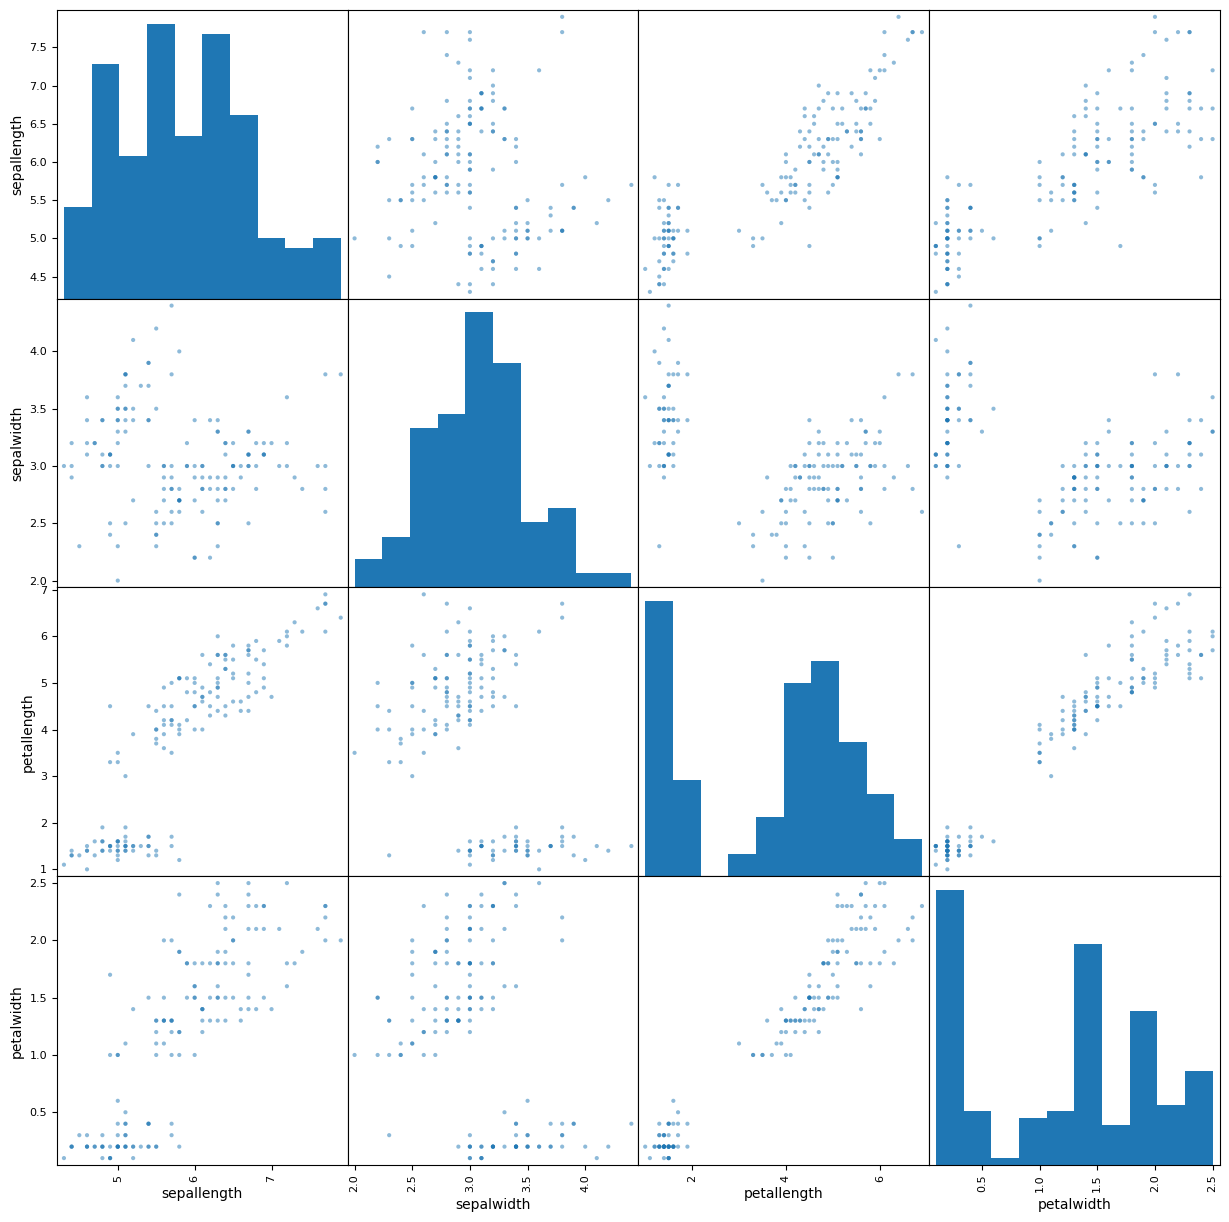

In [50]:
# Create scatter plots for all feature pairs (4 x 4)

scatters1 = P.plotting.scatter_matrix(iris_values, figsize=(15,15))
scatters1

<h2>2.</h2>

,sepallength,sepalwidth,petallength,petalwidth,class,color,0,1,2,3
0,5.1,3.5,1.4,0.2,Iris-setosa,2,-2.264542,0.505704,-0.121943,-0.023073
1,4.9,3.0,1.4,0.2,Iris-setosa,2,-2.086426,-0.655405,-0.227251,-0.103208
2,4.7,3.2,1.3,0.2,Iris-setosa,2,-2.367950,-0.318477,0.051480,-0.027825
3,4.6,3.1,1.5,0.2,Iris-setosa,2,-2.304197,-0.575368,0.098860,0.066311
4,5.0,3.6,1.4,0.2,Iris-setosa,2,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,1.870522,0.382822,0.254532,-0.388890
146,6.3,2.5,5.0,1.9,Iris-virginica,0,1.558492,-0.905314,-0.025382,-0.221322
147,6.5,3.0,5.2,2.0,Iris-virginica,0,1.520845,0.266795,0.179277,-0.118903
148,6.2,3.4,5.4,2.3,Iris-virginica,0,1.376391,1.016362,0.931405,-0.024146


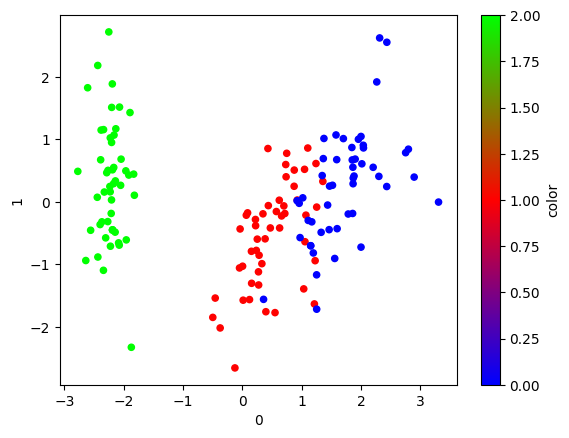

In [51]:
# create PCA plot

# standardise variables to get similar variances
iris_standardised = SP.StandardScaler().fit(iris_values).transform(iris_values)
# create PCA model
pca = SD.PCA().fit(iris_standardised)
# transform data into new space
iris_pca = P.DataFrame(pca.transform(iris_standardised))
# add transformed data back to original data frame
iris_extended = P.concat([iris, iris_pca], axis=1)

# visualise the first two PCA components and
# colour data points by seed variety

iris_extended.plot.scatter(0, 1, c='color', colormap='brg')
iris_extended

<p>Setosa differs from the other two very significantly. Versicolor and Virginica are also a little different but they are much closer together.</p>

<h2>3.</h2>

In [52]:
# retrieve loadings

loadings = P.DataFrame(pca.components_, columns=iris_values.columns)
loadings

,sepallength,sepalwidth,petallength,petalwidth
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,-0.721017,0.242033,0.140892,0.633801
3,-0.261996,0.124135,0.801154,-0.523546


<p>Component 1 (row 0) has three very equally important features. Only sepal width isn't important. Sepal length, petal length, and petal width all are quite equally important</0>
<p>For component 2 (row 1) the picture is very different. Sepal width is now the most important feature by a lot. Sepal length is also important. Petal length and petal width are not important.</p>

<h2>4.</h2>

In [53]:
# correlations between the original data features (axes)

# normality tests

print(S.shapiro(iris['sepallength']))
print(S.shapiro(iris['sepalwidth']))
print(S.shapiro(iris['petallength']))
print(S.shapiro(iris['petalwidth']))

ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)
ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)
ShapiroResult(statistic=0.8764244318008423, pvalue=7.545183366985952e-10)
ShapiroResult(statistic=0.9026243686676025, pvalue=1.8646931110311016e-08)


<p>None of the sets are normally distributed (sepal width maybe but it doesn't matter because none of the others are)</p>

In [54]:
# correlation

iris_corr = iris_values.corr(method='spearman')
iris_corr

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.159457,0.881386,0.834421
sepalwidth,-0.159457,1.000000,-0.303421,-0.277511
petallength,0.881386,-0.303421,1.000000,0.936003
petalwidth,0.834421,-0.277511,0.936003,1.000000


<p>Of the original data features the most correlated pair is petal length and petal width (r=0.94). Also sepal length is correlated quite significantly with petal length (r=0.88) and petal width (r=0.83).</p>

In [63]:
# correlations between the PCA features (axes)

# normality tests

print(S.shapiro(iris_extended[0]))
print(S.shapiro(iris_extended[1]))
print(S.shapiro(iris_extended[2]))
print(S.shapiro(iris_extended[3]),'\n')

print(S.kstest(iris_extended[0], 'norm'))
print(S.kstest(iris_extended[1], 'norm'))
print(S.kstest(iris_extended[2], 'norm'))
print(S.kstest(iris_extended[3], 'norm'))

ShapiroResult(statistic=0.8866012692451477, pvalue=2.4792503605652882e-09)
ShapiroResult(statistic=0.9905313849449158, pvalue=0.41307923197746277)
ShapiroResult(statistic=0.9851860404014587, pvalue=0.10854074358940125)
ShapiroResult(statistic=0.9863075613975525, pvalue=0.14551861584186554) 

KstestResult(statistic=0.2989851569326099, pvalue=2.1897349887145147e-12, statistic_location=-1.820411563337214, statistic_sign=1)
KstestResult(statistic=0.055086814936233575, pvalue=0.7315790730085264, statistic_location=1.0724744961271226, statistic_sign=1)
KstestResult(statistic=0.22192042422315528, pvalue=5.714105235813653e-07, statistic_location=0.35333027867038125, statistic_sign=1)
KstestResult(statistic=0.3847373484322305, pvalue=1.736693093010026e-20, statistic_location=0.2756615502307261, statistic_sign=1)


<p>With only PCA feature sepal width we can say that distribution is normal.</p>

In [70]:
# correlation

iris_pca_corr = iris_extended.iloc[:,6:10].corr(method='spearman')
iris_pca_corr

,0,1,2,3
0,1.000000,0.127132,-0.029161,-0.093783
1,0.127132,1.000000,0.013587,-0.069575
2,-0.029161,0.013587,1.000000,0.064640
3,-0.093783,-0.069575,0.064640,1.000000


<p>None of the PCA features seem to be correlated at all.</p>

<h2>5.</h2>

In [73]:
# cluster the samples into 3 clusters

kmeans = SC.KMeans(n_clusters=3).fit(iris_standardised)


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='0', ylabel='1'>

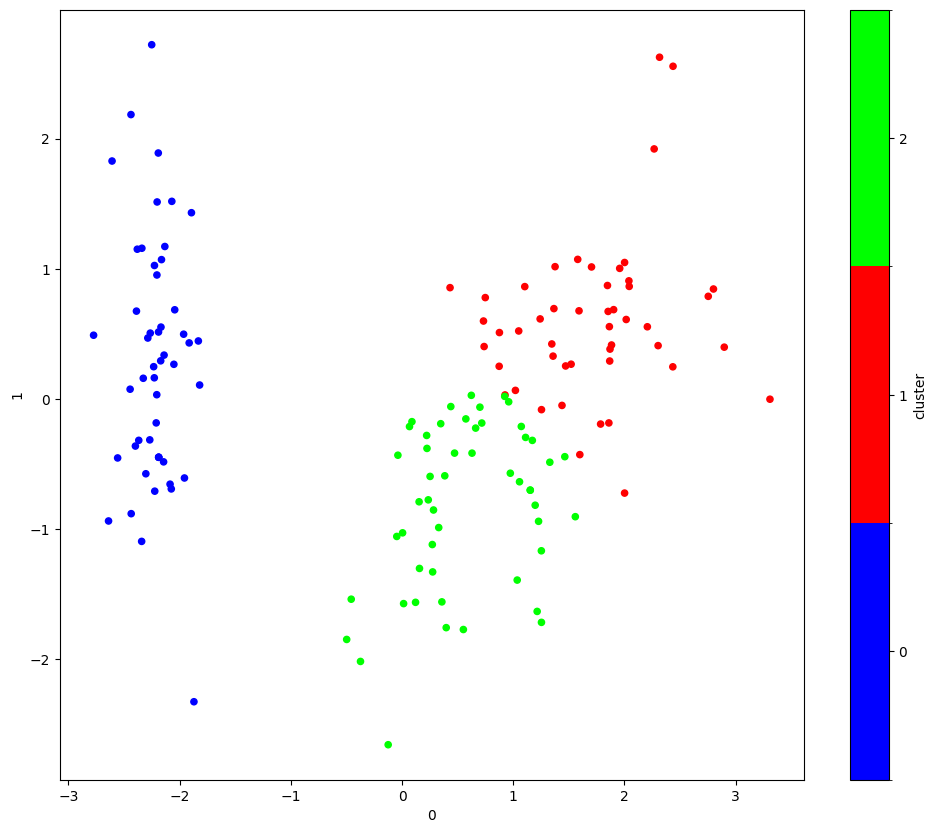

In [74]:
# visualize the clusters on top of PCA

# get memberships of data points in clusters
predictions = kmeans.predict(iris_standardised)
# add memberships back to original data frame
iris_extended['cluster'] = P.Categorical(predictions)

# visualise the first two PCA components and
# colour data points by cluster membership
iris_extended.plot.scatter(0, 1, c='cluster', colormap='brg', figsize=(12,10))

In [79]:
# compare with the known species per each sample

P.crosstab(iris_extended['class'], iris_extended['cluster'])

cluster,0,1,2
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,12,38
Iris-virginica,0,36,14


<p>Species setosa is perfectly in its own cluster. However, species versicolor and virginica are a bit mixed. Species virginica is mostly in the red cluster (36 out of 50) and species versicolor is mostly in the green cluster (38 out of 50). The clusters do not correspond to the species perfectly but it is pretty good.</p>